##Trabalho Final da Disciplina d Análise Preditiva [IBMEC - 03/2023]
###MBA em BI & Data Science
###Karlena Holanda



In [170]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [172]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import requests

#tensorflow

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [214]:
#fonte de dados
url = "https://www.dadosdemercado.com.br/bolsa/acoes"
r = requests.get(url)
html = r.text
df_web_page = pd.read_html(html, header=0, index_col=5)[0]
df_web_page.head(50)

,Código,Nome,Volume,Última (R$),Variação
NaN,MGLU3,Magazine Luiza,188.581.600,372,"+9,41%"
NaN,VIIA3,Via,128.348.500,204,"+12,09%"
NaN,HAPV3,Hapvida,103.956.800,250,"+1,21%"
NaN,PETR4,Petrobras,58.323.200,2419,"-3,16%"
NaN,B3SA3,B3,49.298.300,1135,"+0,80%"
NaN,ITUB4,Itaú Unibanco,33.902.300,2378,"-1,20%"
NaN,BBDC4,Banco Bradesco,33.449.700,1342,"-1,11%"
NaN,RAIZ4,Raízen,31.406.700,262,"-3,68%"
NaN,AMER3,AMER3,25.756.000,105,"+0,00%"
NaN,ITSA4,Itaúsa,25.342.700,795,"-1,49%"


In [225]:
#selecionei 10 das 50 acima
cod_ativos_selecionados = ['PETR4.SA', 'GGBR4.SA', 'BBAS3.SA', 'LREN3.SA','AMAR3.SA', 'MGLU3.SA' ,'CVCB3.SA', 'PRIO3.SA', 'GOAU4.SA','ABEV3.SA']

In [226]:
def codigo_ativo(indice):
  return cod_ativos_selecionados[indice][:-3]

In [227]:
def codigo_ativos_selecionados():
  codigos = []
  for i in range(len(cod_ativos_selecionados)):
    codigo = codigo_ativo(i)
    codigos.append(codigo)
  return codigos

In [228]:
#exibe o dataframe filtrado a partir das funções declaradas acima
df_web_page[df_web_page['Código'].isin(codigo_ativos_selecionados())]

,Código,Nome,Volume,Última (R$),Variação
NaN,MGLU3,Magazine Luiza,188.581.600,372,"+9,41%"
NaN,PETR4,Petrobras,58.323.200,2419,"-3,16%"
NaN,CVCB3,CVC,21.538.700,355,"+3,50%"
NaN,PRIO3,PetroRio,20.279.700,3177,"-4,34%"
NaN,ABEV3,Ambev,15.164.100,1361,"+0,74%"
NaN,LREN3,Lojas Renner,12.844.700,1922,"+1,53%"
NaN,AMAR3,Lojas Marisa,12.449.900,073,"+1,39%"
NaN,GGBR4,Gerdau,9.396.300,2670,"-1,07%"
NaN,BBAS3,Banco do Brasil,9.110.400,3780,"-0,63%"
NaN,GOAU4,Metalúrgica Gerdau,8.595.800,1187,"-0,84%"


In [229]:
dados_series = yf.download(cod_ativos_selecionados, start="2018-01-01", end="2022-01-01")

[*********************100%***********************]  10 of 10 completed


In [233]:
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 
df.head() 

Close                                                   \
             ABEV3.SA AMAR3.SA   BBAS3.SA   CVCB3.SA GGBR4.SA GOAU4.SA   
Date                                                                     
2018-01-02  21.690001     7.79  32.930000  49.880001    12.97     6.05   
2018-01-03  21.740000     8.30  33.349998  49.590000    12.95     6.03   
2018-01-04  21.620001     8.20  33.669998  49.990002    13.65     6.25   
2018-01-05  21.700001     8.19  33.669998  49.740002    13.48     6.27   
2018-01-08  21.660000     8.33  33.750000  49.529999    13.95     6.35   

                                                     
             LREN3.SA  MGLU3.SA   PETR4.SA PRIO3.SA  
Date                                                 
2018-01-02  31.882135  2.478125  16.549999   1.7090  
2018-01-03  32.287991  2.446875  16.700001   1.7400  
2018-01-04  32.468369  2.505625  16.730000   1.8002  
2018-01-05  32.269951  2.456250  16.830000   1.9016  
2018-01-08  32.107609  2.456562  17.030001   2.0456

##Analise dos dados dos ativos selecionados

In [234]:
#precisa usar o nome especifico da coluna na montagem do valor de y
#para isso foi feito os dois filtros abaixo
def filtrar_ativo(ativo):
  df_filtro = df['Close'][ativo]
  return df_filtro

In [235]:
def ativo_normalizado(ativo):
  y = filtrar_ativo(ativo)
  minimo = np.min(y)
  maximo = np.max(y)
  y = (y - minimo)/(maximo - minimo)
  return y

In [236]:
#cria os valores de y usando as funções de limpeza de dados acima
y = []
for a in cod_ativos_selecionados:
  ativo = ativo_normalizado(a)
  y.append(ativo)

In [237]:
x = np.arange (0,len(df))

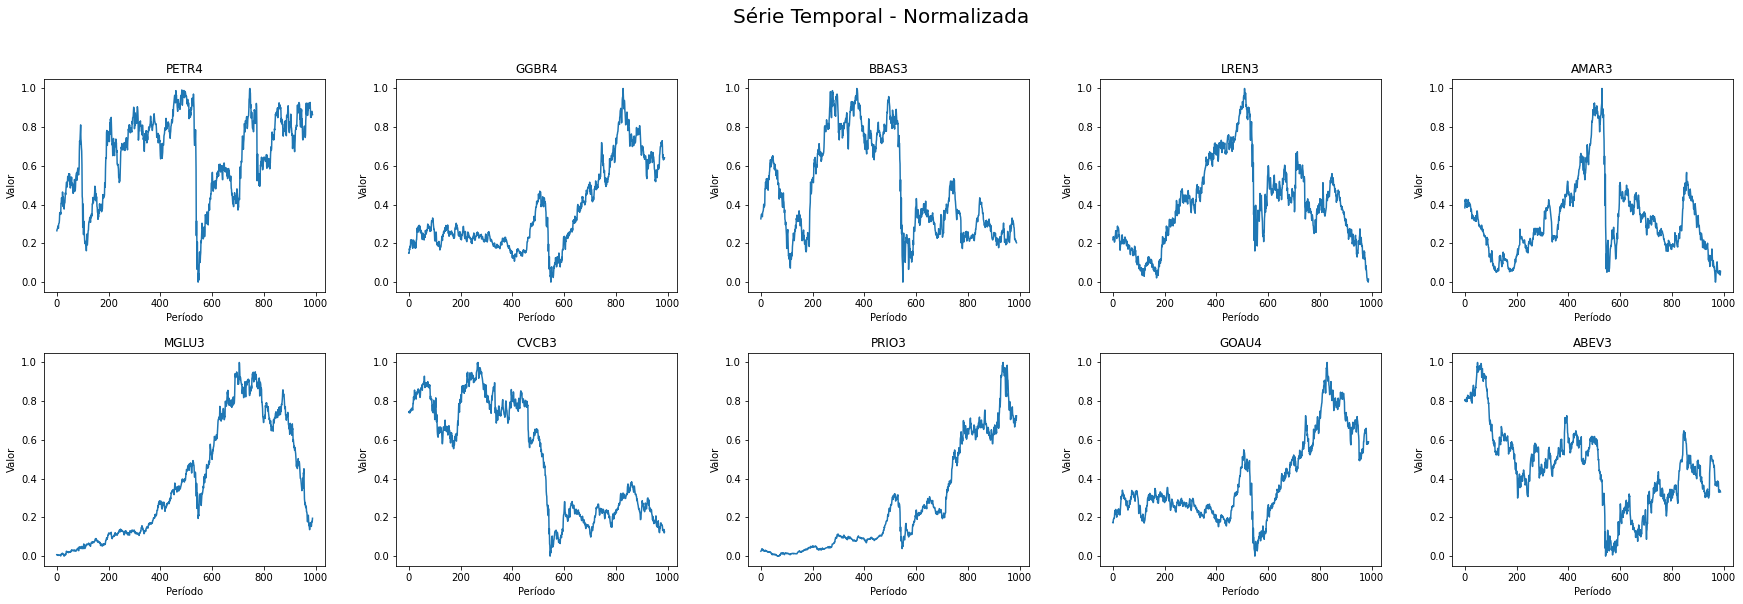

In [238]:
title="Série Temporal - Normalizada"

fig1, ax = plt.subplots(2,5,figsize=(25,9))
fig1.suptitle(title, y=0.95, fontsize=20)
fig1.tight_layout(pad=4)

cont=0;
for i in range(2):
  for j in range(5):
    ax[i][j].plot(x,y[cont])
    ax[i][j].set(xlabel='Período', ylabel='Valor')
    ax[i][j].title.set_text(codigo_ativo(cont))
    cont=cont+1

plt.show()

##Treino do algoritmo

In [239]:
treinos = []
testes = []

for i in range(len(cod_ativos_selecionados)):
  percentual_treinamento = 0.8
  qtd_treinamento = int(percentual_treinamento*(len(x)));

  x_treino = x[0:qtd_treinamento] 
  x_teste = x[qtd_treinamento:]

  y_treino = y[i][0:qtd_treinamento]
  y_teste = y[i][qtd_treinamento:]

  treino = np.array(list(zip(x_treino, y_treino)))
  teste = np.array(list(zip(x_teste, y_teste)))
  
  treinos.append(treino)
  testes.append(teste)

  for j in range(5):
    print('treino[{} - {}]: {}'.format(codigo_ativo(i), j+1, treino[j]))
  print('\n')

treino[PETR4 - 1]: [0.         0.26525462]
treino[PETR4 - 2]: [1.         0.27281899]
treino[PETR4 - 3]: [2.         0.27433179]
treino[PETR4 - 4]: [3.         0.27937467]
treino[PETR4 - 5]: [4.         0.28946044]


treino[GGBR4 - 1]: [0.         0.14925887]
treino[GGBR4 - 2]: [1.         0.14856943]
treino[GGBR4 - 3]: [2.         0.17269904]
treino[GGBR4 - 4]: [3.         0.16683899]
treino[GGBR4 - 5]: [4.         0.18304031]


treino[BBAS3 - 1]: [0.         0.32677763]
treino[BBAS3 - 2]: [1.        0.3394856]
treino[BBAS3 - 3]: [2.         0.34916789]
treino[BBAS3 - 4]: [3.         0.34916789]
treino[BBAS3 - 5]: [4.         0.35158852]


treino[LREN3 - 1]: [0.        0.2187578]
treino[LREN3 - 2]: [1.         0.22988064]
treino[LREN3 - 3]: [2.         0.23482406]
treino[LREN3 - 4]: [3.         0.22938624]
treino[LREN3 - 5]: [4.         0.22493711]


treino[AMAR3 - 1]: [0.         0.38360861]
treino[AMAR3 - 2]: [1.        0.4255792]
treino[AMAR3 - 3]: [2.         0.41734965]
treino[AM

In [240]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)
     

In [241]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [242]:
x_treinos = []
y_treinos = []
x_testes = []
y_testes = []

for i in range(len(cod_ativos_selecionados)):
  look_back = 2
  x_treino, y_treino = preparar_dados(treinos[i], look_back)
  x_teste, y_teste = preparar_dados(testes[i], look_back)

  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                              x_treino.shape[1], 
                              n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                        x_teste.shape[1], 
                        n_caracteristicas))

  x_treinos.append(x_treino)
  y_treinos.append(y_treino)
  x_testes.append(x_teste)
  y_testes.append(y_teste)

  #print('ax: {}'.format(trainx))
  #print('y: {}'.format(y))
  for j in range(5):
    print('treino[{} - {}]: {} -> {}'.format(codigo_ativo(i), j+1, x_treino[j], y_treino[j]))
  
  print('\n')

treino[PETR4 - 1]: [[0.26525462]
 [0.27281899]] -> 0.27433178717549045
treino[PETR4 - 2]: [[0.27281899]
 [0.27433179]] -> 0.2793746705363175
treino[PETR4 - 3]: [[0.27433179]
 [0.27937467]] -> 0.2894604372579715
treino[PETR4 - 4]: [[0.27937467]
 [0.28946044]] -> 0.2894604372579715
treino[PETR4 - 5]: [[0.28946044]
 [0.28946044]] -> 0.2778617766725694


treino[GGBR4 - 1]: [[0.14925887]
 [0.14856943]] -> 0.17269903726236507
treino[GGBR4 - 2]: [[0.14856943]
 [0.17269904]] -> 0.16683898661210286
treino[GGBR4 - 3]: [[0.17269904]
 [0.16683899]] -> 0.1830403050495327
treino[GGBR4 - 4]: [[0.16683899]
 [0.18304031]] -> 0.1857979720762462
treino[GGBR4 - 5]: [[0.18304031]
 [0.18579797]] -> 0.17924852110629766


treino[BBAS3 - 1]: [[0.32677763]
 [0.3394856 ]] -> 0.3491678852825349
treino[BBAS3 - 2]: [[0.3394856 ]
 [0.34916789]] -> 0.3491678852825349
treino[BBAS3 - 3]: [[0.34916789]
 [0.34916789]] -> 0.3515885154878146
treino[BBAS3 - 4]: [[0.34916789]
 [0.35158852]] -> 0.3419062255106976
treino[BBAS3

##Aplicar o modelo aos dados

In [251]:
modelos = []

for i in range(len(cod_ativos_selecionados)):
  n_etapas = x_treinos[i].shape[1]
  n_caracteristicas = x_treinos[i].shape[2]
  epocas = 20
  n_unidades = 100
  tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
  modelo = Sequential()
  camada_de_entrada=(n_etapas, n_caracteristicas)
  modelo.add(LSTM(n_unidades, 
                return_sequences = True, 
                input_shape = camada_de_entrada))
  modelo.add(Dropout(0.2))
  modelo.add(LSTM(128,
                input_shape = camada_de_entrada))
  modelo.add(Dense(1))

  modelos.append(modelo)


In [252]:
for i in range(len(cod_ativos_selecionados)):
  modelos[i].summary()
  print ('\n')

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_40 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_81 (LSTM)              (None, 128)               117248    
                                                                 
 dense_40 (Dense)            (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_82 (LSTM)       

In [253]:
for i in range(len(cod_ativos_selecionados)):
  modelos[i].compile(loss = 'mean_squared_error', 
                optimizer = 'adam')

In [254]:
historicos = []

for i in range(len(cod_ativos_selecionados)):
  historico = modelos[i].fit(x_treinos[i], y_treinos[i],
                        epochs = epocas,
                        batch_size = 70,
                        verbose = 2,
                        shuffle = False,
                        validation_split = 0.3)
  historicos.append(historico)

Epoch 1/20
8/8 - 8s - loss: 0.3670 - val_loss: 0.1897 - 8s/epoch - 1s/step
Epoch 2/20
8/8 - 0s - loss: 0.1533 - val_loss: 0.0345 - 233ms/epoch - 29ms/step
Epoch 3/20
8/8 - 0s - loss: 0.0105 - val_loss: 0.0411 - 224ms/epoch - 28ms/step
Epoch 4/20
8/8 - 0s - loss: 0.0358 - val_loss: 0.0181 - 199ms/epoch - 25ms/step
Epoch 5/20
8/8 - 0s - loss: 0.0182 - val_loss: 0.0089 - 223ms/epoch - 28ms/step
Epoch 6/20
8/8 - 0s - loss: 0.0139 - val_loss: 0.0076 - 224ms/epoch - 28ms/step
Epoch 7/20
8/8 - 0s - loss: 0.0080 - val_loss: 0.0114 - 218ms/epoch - 27ms/step
Epoch 8/20
8/8 - 0s - loss: 0.0102 - val_loss: 0.0086 - 197ms/epoch - 25ms/step
Epoch 9/20
8/8 - 0s - loss: 0.0091 - val_loss: 0.0061 - 187ms/epoch - 23ms/step
Epoch 10/20
8/8 - 0s - loss: 0.0070 - val_loss: 0.0061 - 229ms/epoch - 29ms/step
Epoch 11/20
8/8 - 0s - loss: 0.0067 - val_loss: 0.0057 - 360ms/epoch - 45ms/step
Epoch 12/20
8/8 - 0s - loss: 0.0063 - val_loss: 0.0046 - 370ms/epoch - 46ms/step
Epoch 13/20
8/8 - 0s - loss: 0.0057 - val_

##Visualização do aprendizado

In [255]:
hist = pd.DataFrame(historicos[0].history)
hist.head()

,loss,val_loss
0,0.366958,0.189687
1,0.153268,0.034454
2,0.010454,0.041081
3,0.035773,0.018146
4,0.018233,0.008881


In [256]:
for i in range(len(cod_ativos_selecionados)):
  loss = modelos[i].evaluate(x_testes[i], y_testes[i], batch_size=64)
  print("loss: {}".format(loss))

4/4 [==============================] - 0s 8ms/step - loss: 0.0012
loss: 0.0012194168521091342
4/4 [==============================] - 0s 10ms/step - loss: 0.0014
loss: 0.0013911088462918997
4/4 [==============================] - 0s 8ms/step - loss: 8.1919e-04
loss: 0.0008191860397346318
4/4 [==============================] - 0s 7ms/step - loss: 8.3761e-04
loss: 0.0008376126061193645
4/4 [==============================] - 0s 9ms/step - loss: 8.2371e-04
loss: 0.0008237066795118153
4/4 [==============================] - 0s 7ms/step - loss: 0.0017
loss: 0.0017360735218971968
4/4 [==============================] - 0s 7ms/step - loss: 0.0146
loss: 0.014550893567502499
4/4 [==============================] - 0s 11ms/step - loss: 0.0016
loss: 0.0015630889683961868
4/4 [==============================] - 0s 13ms/step - loss: 0.0010
loss: 0.0010452435817569494
4/4 [==============================] - 0s 8ms/step - loss: 0.0011
loss: 0.0010667508468031883


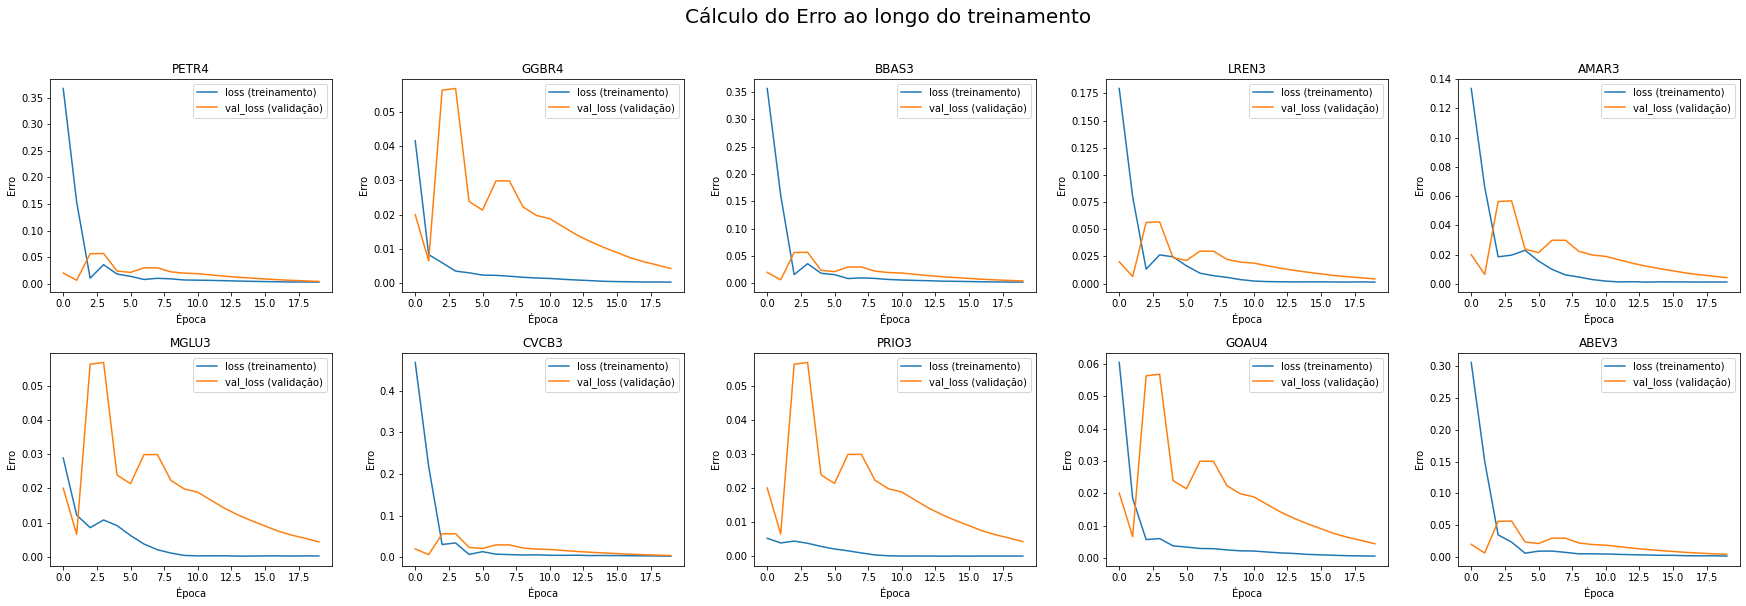

In [257]:
title="Cálculo do Erro ao longo do treinamento"

fig1, ax = plt.subplots(2,5,figsize=(25,9))
fig1.suptitle(title, y=0.95, fontsize=20)
fig1.tight_layout(pad=4)

cont=0;
for i in range(2):
  for j in range(5):
    ax[i][j].plot(historicos[cont].history['loss'])
    ax[i][j].plot(historico.history['val_loss'])
    ax[i][j].legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
    ax[i][j].set(xlabel='Época', ylabel='Erro')
    ax[i][j].title.set_text(codigo_ativo(cont))
    cont=cont+1

plt.show()

##Realização da Predição

In [258]:
predicoes = []

for i in range(len(cod_ativos_selecionados)):
  predicao = modelo.predict(x_testes[i])
  predicoes.append(predicao)

7/7 [==============================] - 0s 6ms/step


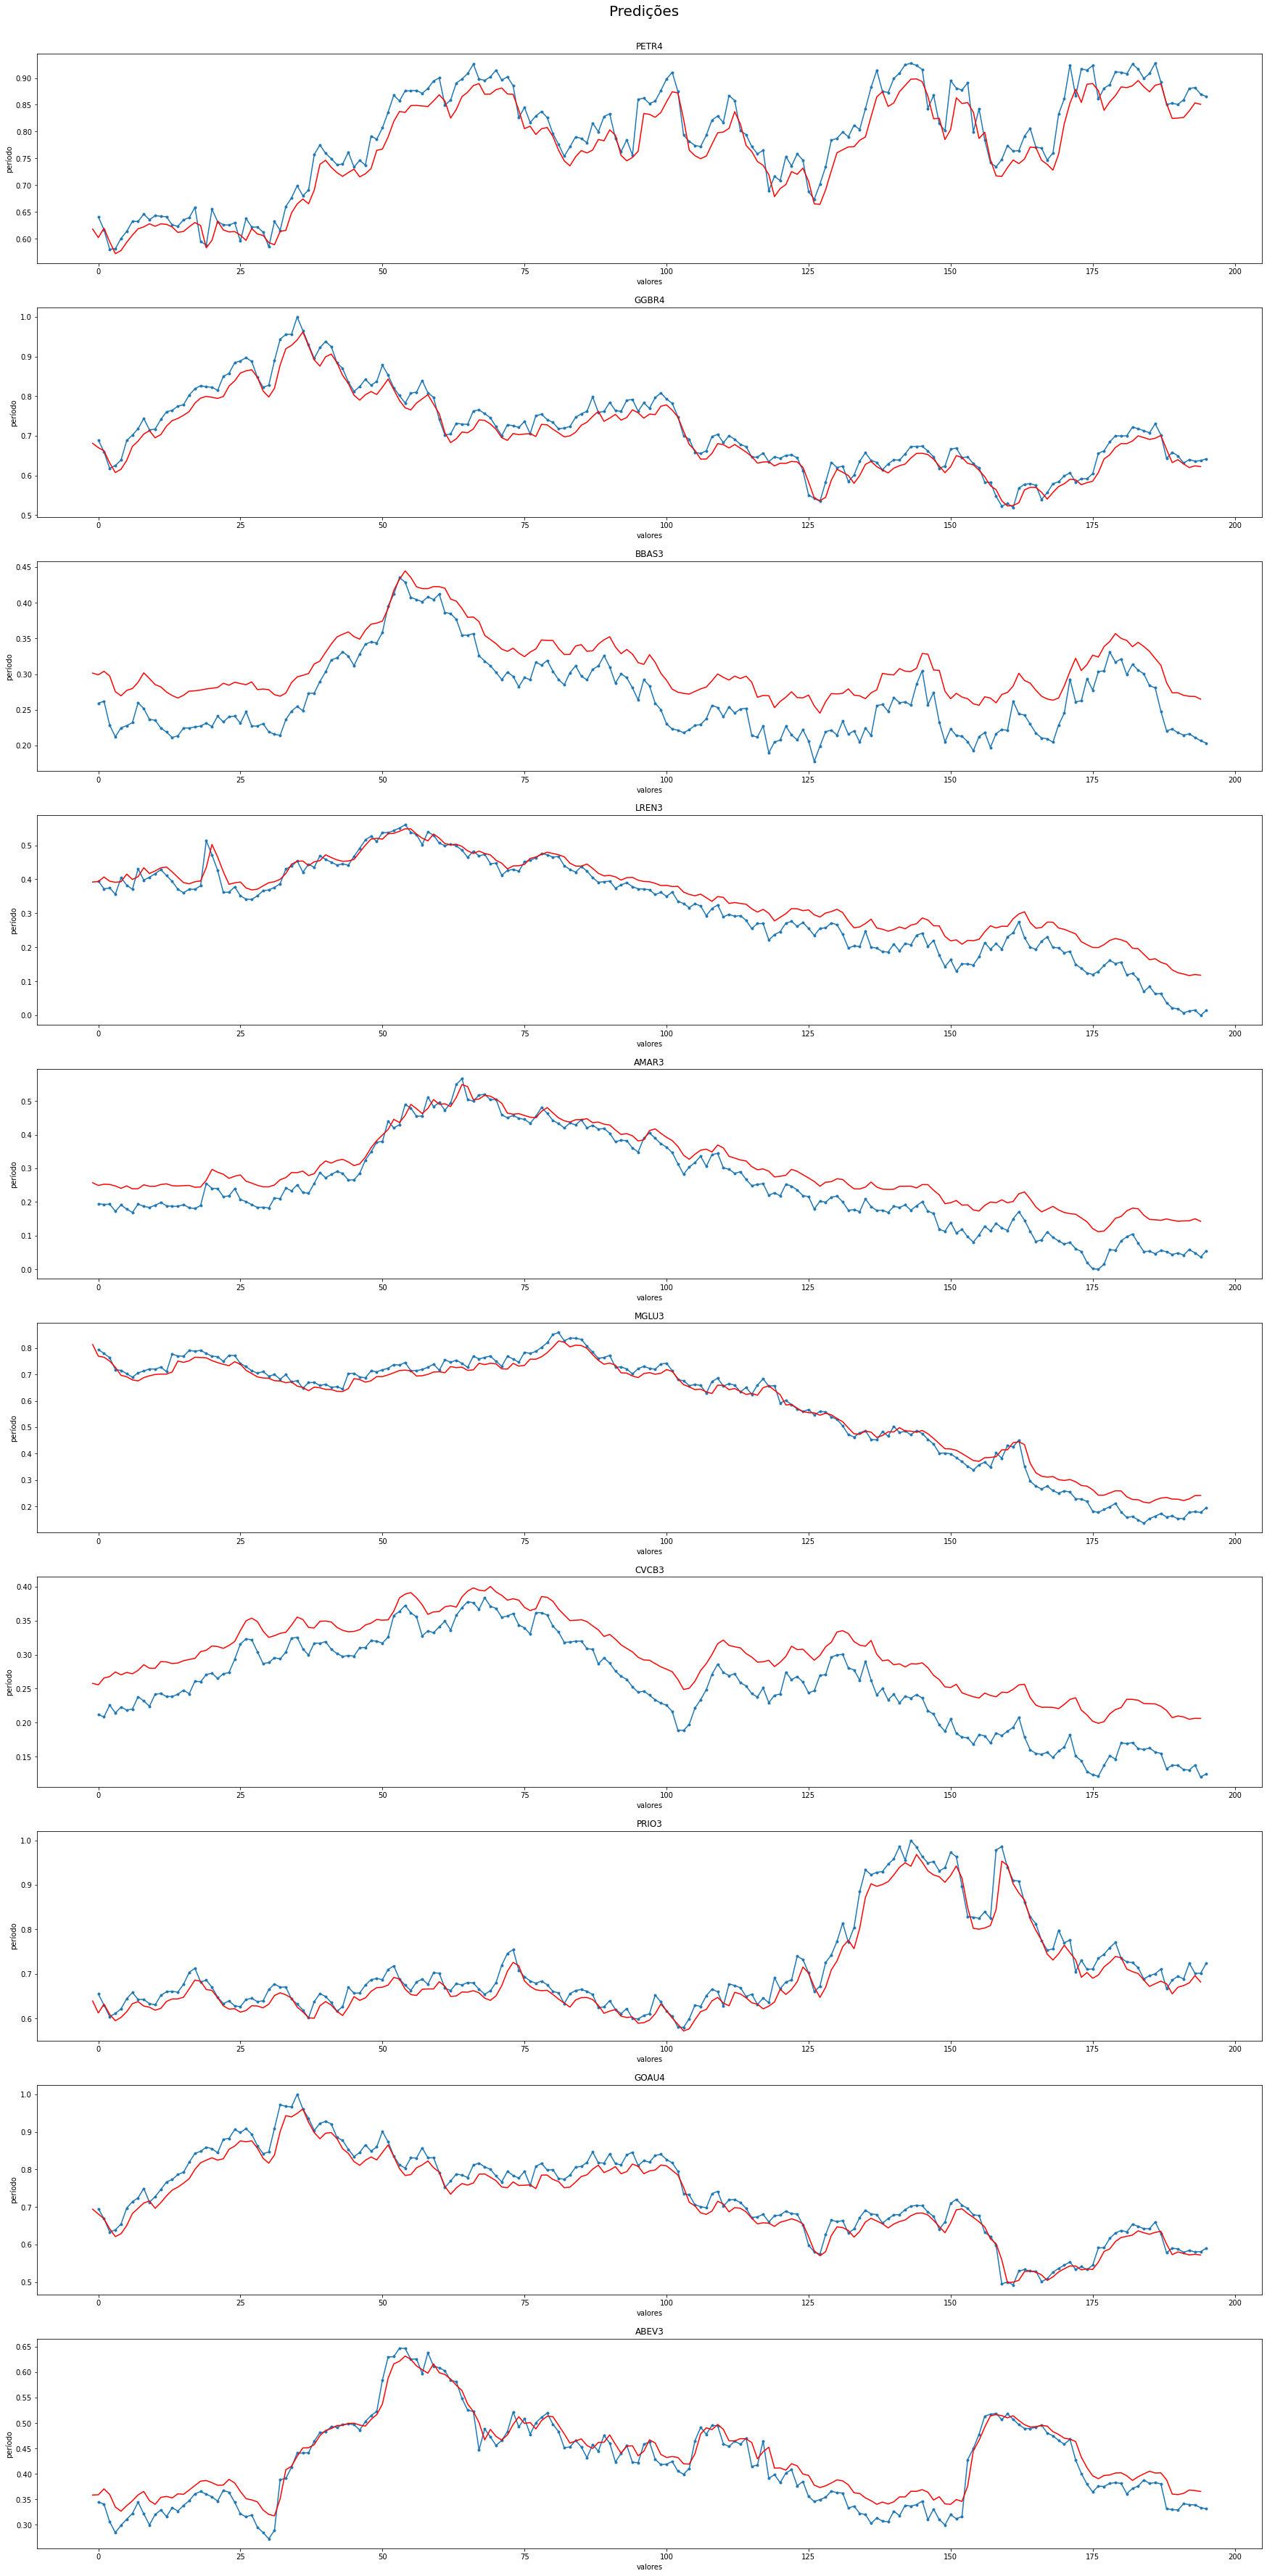

In [259]:
lst_dados_predicoes = []

title="Predições"

fig1, ax = plt.subplots(10,figsize=(25,50))
fig1.suptitle(title, y=0.99, fontsize=20)
fig1.tight_layout(pad=4)

for i in range(len(cod_ativos_selecionados)):
  look_back = 1
  valores_reais_y = y_testes[i]
  ax[i].plot(list(range(len(valores_reais_y))), 
          valores_reais_y, 
          marker='.', 
          label="Real")
  lst_dados_predicao=[w[0] for w in predicoes[i]]
  ax[i].plot(list(np.arange(len(predicoes[i]))-look_back), 
          lst_dados_predicao, 
          'r',label="Estimação do Modelo")
  ax[i].set(xlabel='valores', ylabel='período')
  ax[i].title.set_text(codigo_ativo(i))
  lst_dados_predicoes.append(lst_dados_predicao)

plt.show()

In [260]:
n=len(x_teste)
x_teste[n-1]

array([[0.3391239 ],
       [0.33383685]])

In [261]:
minhas_predicoes = []

for i in range(len(blue_chips)):
  minha_predicao = modelos[i].predict([x_testes[i][n-1]])
  minhas_predicoes.append(minha_predicao)

1/1 [==============================] - 1s 884ms/step


1/1 [==============================] - 1s 839ms/step


1/1 [==============================] - 1s 882ms/step


1/1 [==============================] - 1s 874ms/step


1/1 [==============================] - 1s 872ms/step


1/1 [==============================] - 1s 846ms/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 958ms/step


1/1 [==============================] - 1s 852ms/step


In [262]:
for i in range(len(cod_ativos_selecionados)):
  print(f'A predição enontrada para o código {codigo_ativo(i)} é: {minhas_predicoes[i]}')

A predição enontrada para o código PETR4 é: [[0.26854154]
 [0.2655642 ]]
A predição enontrada para o código GGBR4 é: [[0.20780806]
 [0.20820104]]
A predição enontrada para o código BBAS3 é: [[0.10105206]
 [0.10000288]]
A predição enontrada para o código LREN3 é: [[0.03983273]
 [0.03622362]]
A predição enontrada para o código AMAR3 é: [[0.05000141]
 [0.0471171 ]]
A predição enontrada para o código MGLU3 é: [[0.07371257]
 [0.07295735]]
A predição enontrada para o código CVCB3 é: [[0.1235254 ]
 [0.12001175]]
A predição enontrada para o código PRIO3 é: [[0.22411384]
 [0.22411384]]
A predição enontrada para o código GOAU4 é: [[0.18920165]
 [0.18940537]]
A predição enontrada para o código ABEV3 é: [[0.1435432 ]
 [0.14235386]]


##Aplicando o problema da mochila

In [202]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [263]:
valores_predicao = []
for i in range(len(cod_ativos_selecionados)):
  valores_predicao.append(minhas_predicoes[i][0][0])
valores_predicao

[0.26854154,
 0.20780806,
 0.10105206,
 0.03983273,
 0.05000141,
 0.07371257,
 0.123525396,
 0.22411384,
 0.18920165,
 0.1435432]

In [265]:
from IPython.display import display, Math, Latex, Markdown
from mip import Model, maximize, xsum, CBC, BINARY, OptimizationStatus

In [267]:
coef_funcao_objetivo = valores_predicao
coef_restr = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
termo_independente = 3
I = range(len(coef_funcao_objetivo))
m = Model("knapsack-karlena")
x = [m.add_var(var_type=BINARY) for i in I]
     
m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))
funcao_objetivo=xsum(coef_funcao_objetivo[i] * x[i] for i in I)
m += xsum(coef_restr[i] * x[i] for i in I) <= termo_independente
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões) e {m.num_nz} zero(s)')
     


O modelo tem 10 variável(eis), 1 restrição(ões) e 10 zero(s)


In [268]:
status = m.optimize(max_seconds=2)
status == OptimizationStatus.OPTIMAL

True

In [269]:
itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))


Itens selecionados: ['x1', 'x2', 'x8']


In [270]:
print(f'Valor da solução ótima = {m.objective_value}')

Valor da solução ótima = 0.7004634439945221


##Validando resultado

In [271]:
valores_ordenados = []

for i in range(len(cod_ativos_selecionados)):
  valores_ordenados.append(['x' + str(i+1), codigo_ativo(i), valores_predicao[i]])
valores_ordenados.sort(key=lambda x:x[2],reverse=True)
valores_ordenados

[['x1', 'PETR4', 0.26854154],
 ['x8', 'PRIO3', 0.22411384],
 ['x2', 'GGBR4', 0.20780806],
 ['x9', 'GOAU4', 0.18920165],
 ['x10', 'ABEV3', 0.1435432],
 ['x7', 'CVCB3', 0.123525396],
 ['x3', 'BBAS3', 0.10105206],
 ['x6', 'MGLU3', 0.07371257],
 ['x5', 'AMAR3', 0.05000141],
 ['x4', 'LREN3', 0.03983273]]